In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import numpy as np
import os,cv2

def plot_gallary(images, titles,h,w,n_row=3,n_col=4):
    """helper function"""
    plt.figure(figsize=(1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom, left=.01,right=.99,hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    

In [1]:
pip install opencv-python


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Kajal yadav\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
import cv2
print(cv2.__version__)




4.10.0


In [8]:

dir_name = "F:/AI_Internship/ANN_Face_recognition/dataset/faces/"

# Initialize lists and variables
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

# Load images and preprocess
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path): 
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)
        target_names.append(person_name)
    person_id += 1

y = np.array(y)
X = np.array(X)  
target_names = np.array(target_names)
n_features = X.shape[1]

print(y.shape, X.shape, target_names.shape)
print("Number of samples:", n_samples)
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("n_classes:%d"%n_classes)



(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450
n_classes:450


Extracting the top 150 eigenfaces from 337 faces


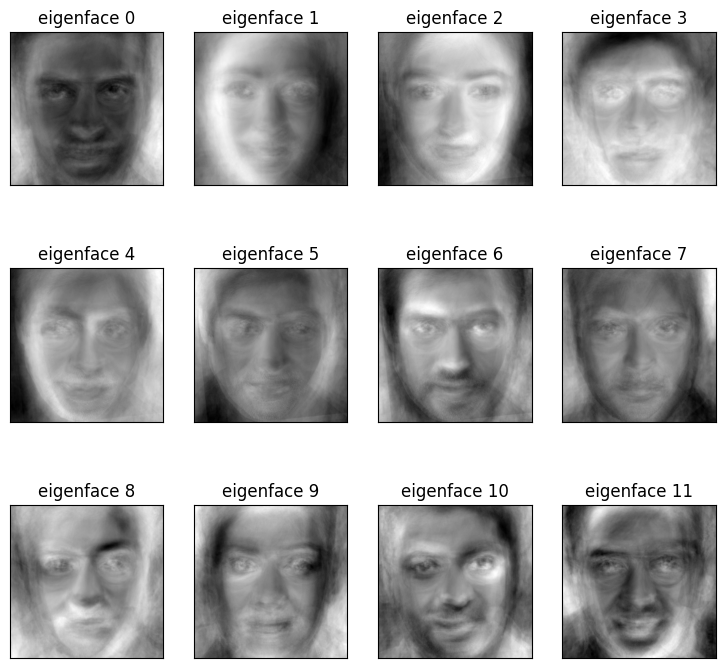

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

# Compute PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Function to plot gallery
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape, X_test_pca.shape)

# Compute Fisherfaces
lda = LinearDiscriminantAnalysis()

# Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

print("Project done...")


In [10]:
# Train with Multi-Layer Perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True)
clf.fit(X_train_lda, y_train)

print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]

print(model_info)


Iteration 1, loss = 3.01137826
Iteration 2, loss = 2.95577920
Iteration 3, loss = 2.90578358
Iteration 4, loss = 2.85482576
Iteration 5, loss = 2.80397290
Iteration 6, loss = 2.75665690
Iteration 7, loss = 2.70789537
Iteration 8, loss = 2.66240528
Iteration 9, loss = 2.61855406
Iteration 10, loss = 2.57496007
Iteration 11, loss = 2.53184203
Iteration 12, loss = 2.49173013
Iteration 13, loss = 2.45063744
Iteration 14, loss = 2.41295529
Iteration 15, loss = 2.37440967
Iteration 16, loss = 2.33842039
Iteration 17, loss = 2.30473642
Iteration 18, loss = 2.26927199
Iteration 19, loss = 2.23883362
Iteration 20, loss = 2.20601383
Iteration 21, loss = 2.17720178
Iteration 22, loss = 2.14671250
Iteration 23, loss = 2.11812812
Iteration 24, loss = 2.08996464
Iteration 25, loss = 2.06304359
Iteration 26, loss = 2.03803499
Iteration 27, loss = 2.01083808
Iteration 28, loss = 1.98566908
Iteration 29, loss = 1.96045732
Iteration 30, loss = 1.93551454
Iteration 31, loss = 1.91130174
Iteration 32, los

Accuracy: 68.14159292035399


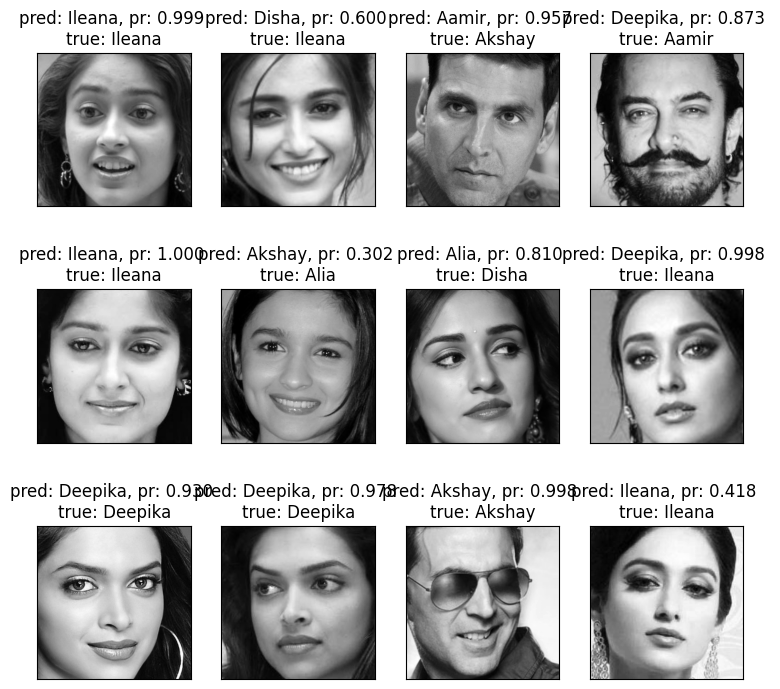

In [11]:

# Making predictions and evaluating the model
y_pred = []
y_prob = []

for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    # print(prob, np.max(prob))
    class_id = np.where(prob == np.max(prob))[0][0]
    # print(class_id)
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

prediction_titles = []
true_positive = 0

for i in range(y_pred.shape[0]):
    # true_name = target_names[y_test[i]].rsplit(' ', 1)[1]
    # pred_name = target_names[y_pred[i]].rsplit('', 1)[-1]
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %.3f \ntrue: %s' % (pred_name, y_prob[i], true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1

accuracy = true_positive * 100 / y_pred.shape[0]
print("Accuracy:", accuracy)

# Function to plot gallery
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Plot results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()


